In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.metrics import euclidean_distances
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Preparando el data set
ruta = "Fifa_stats.csv"
df = pd.read_csv(ruta)
df.head()

,sofifa_id,long_name,dob,age,nationality,club,preferred_foot,height_cm,weight_kg,overall,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,Lionel Andrés Messi Cuccittini,1987-06-24,32,Argentina,FC Barcelona,Left,170,72,94,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,34,Portugal,Juventus,Right,187,83,93,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar da Silva Santos Junior,1992-02-05,27,Brazil,Paris Saint-Germain,Right,175,68,92,...,90,94,27,26,29,9,9,15,15,11
3,200389,Jan Oblak,1993-01-07,26,Slovenia,Atlético Madrid,Right,188,87,91,...,11,68,27,12,18,87,92,78,90,89
4,183277,Eden Hazard,1991-01-07,28,Belgium,Real Madrid,Right,175,74,91,...,88,91,34,27,22,11,12,6,8,8


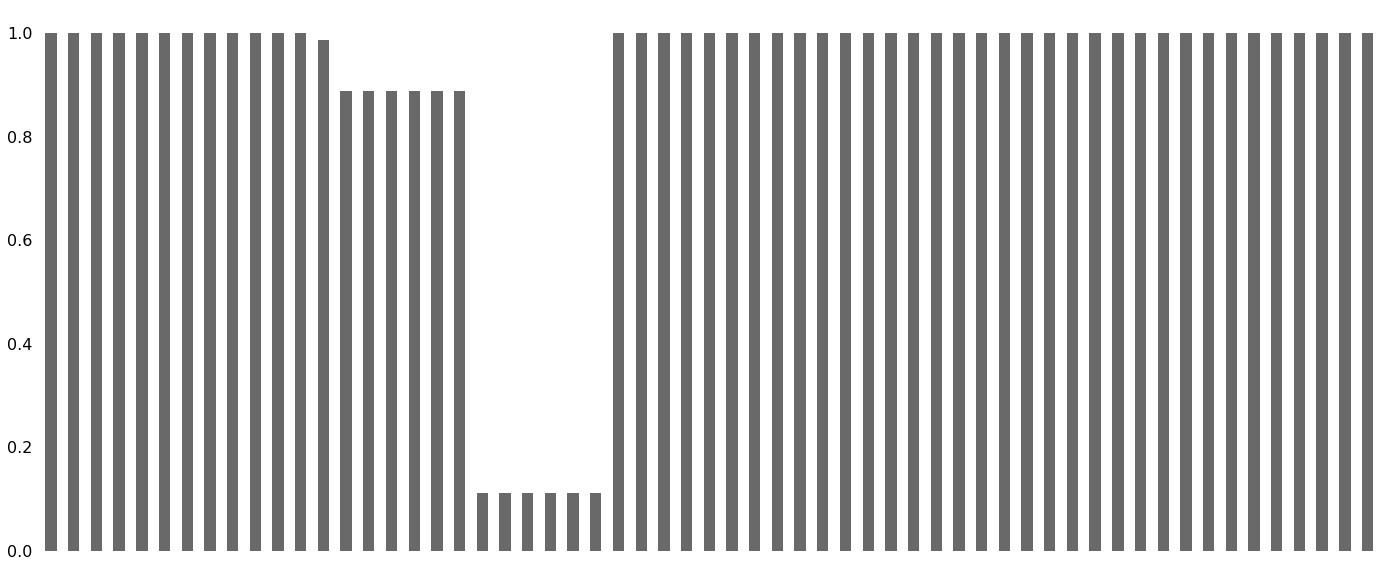

In [3]:
msno.bar(df)

In [4]:
df.columns[df.isnull().any()].tolist()

['team_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']

In [5]:
df.drop(columns=['team_jersey_number'],inplace=True)

In [6]:
df.replace({np.nan:0.0},inplace=True)

In [7]:
df.head()

,sofifa_id,long_name,dob,age,nationality,club,preferred_foot,height_cm,weight_kg,overall,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,Lionel Andrés Messi Cuccittini,1987-06-24,32,Argentina,FC Barcelona,Left,170,72,94,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,34,Portugal,Juventus,Right,187,83,93,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar da Silva Santos Junior,1992-02-05,27,Brazil,Paris Saint-Germain,Right,175,68,92,...,90,94,27,26,29,9,9,15,15,11
3,200389,Jan Oblak,1993-01-07,26,Slovenia,Atlético Madrid,Right,188,87,91,...,11,68,27,12,18,87,92,78,90,89
4,183277,Eden Hazard,1991-01-07,28,Belgium,Real Madrid,Right,175,74,91,...,88,91,34,27,22,11,12,6,8,8


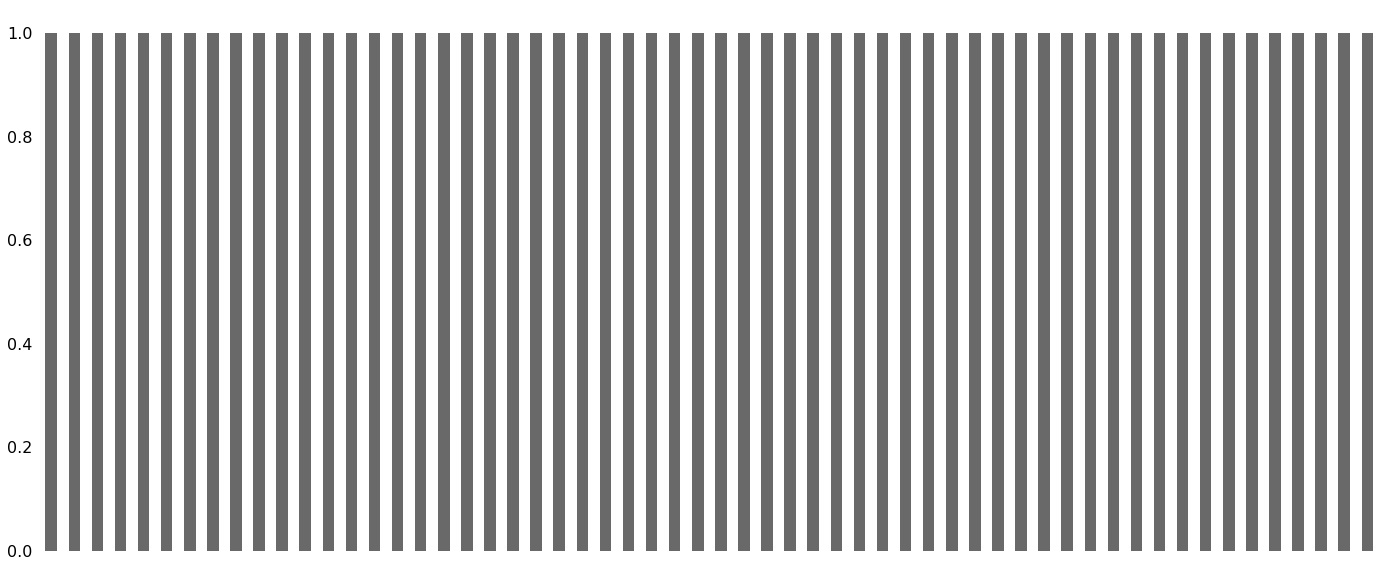

In [8]:
msno.bar(df)

In [9]:
X = df[list(df.describe().columns)]

In [10]:
X.drop(columns=['sofifa_id'],inplace=True)
X.head()

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,height_cm,weight_kg,overall,potential,value_eur,pace,shooting,passing,dribbling,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,87.0,92.0,92.0,96.0,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,90.0,93.0,82.0,89.0,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,91.0,85.0,87.0,95.0,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,0.0,0.0,0.0,0.0,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,91.0,83.0,86.0,94.0,...,88,91,34,27,22,11,12,6,8,8


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X)
X_s = pd.DataFrame(X_s, columns=list(X.columns))
X_s

,age,height_cm,weight_kg,overall,potential,value_eur,pace,shooting,passing,dribbling,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.615385,0.285714,0.366667,1.000000,0.978261,0.905213,0.906250,0.989247,1.000000,1.000000,...,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.554502,0.937500,1.000000,0.891304,0.927083,...,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.423077,0.387755,0.300000,0.956522,0.934783,1.000000,0.947917,0.913978,0.945652,0.989583,...,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.734597,0.000000,0.000000,0.000000,0.000000,...,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.853081,0.947917,0.892473,0.934783,0.979167,...,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0.230769,0.612245,0.483333,0.000000,0.152174,0.000379,0.593750,0.247312,0.304348,0.343750,...,0.376471,0.345238,0.473118,0.517241,0.563218,0.044944,0.043956,0.130435,0.044444,0.142857
18274,0.230769,0.428571,0.266667,0.000000,0.152174,0.000379,0.604167,0.258065,0.358696,0.364583,...,0.352941,0.273810,0.440860,0.551724,0.620690,0.134831,0.054945,0.141304,0.111111,0.087912
18275,0.115385,0.612245,0.416667,0.000000,0.152174,0.000379,0.562500,0.376344,0.478261,0.468750,...,0.341176,0.321429,0.483871,0.540230,0.494253,0.067416,0.076923,0.097826,0.055556,0.142857
18276,0.076923,0.591837,0.400000,0.000000,0.108696,0.000379,0.614583,0.376344,0.510870,0.489583,...,0.341176,0.333333,0.408602,0.448276,0.586207,0.146067,0.087912,0.130435,0.133333,0.131868


In [12]:
muestra = X_s.sample(n=10,random_state=1)

In [13]:
muestra

,age,height_cm,weight_kg,overall,potential,value_eur,pace,shooting,passing,dribbling,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
7459,0.538462,0.612245,0.483333,0.434783,0.413043,0.006872,0.635417,0.494624,0.586957,0.583333,...,0.541176,0.630952,0.731183,0.701149,0.655172,0.146067,0.164835,0.108696,0.133333,0.131868
6440,0.538462,0.591837,0.533333,0.456522,0.434783,0.008057,0.385417,0.376344,0.543478,0.531250,...,0.494118,0.511905,0.688172,0.689655,0.655172,0.056180,0.120879,0.065217,0.055556,0.142857
13550,0.307692,0.224490,0.216667,0.304348,0.413043,0.004028,0.843750,0.602151,0.576087,0.677083,...,0.647059,0.523810,0.268817,0.229885,0.218391,0.067416,0.131868,0.141304,0.066667,0.098901
14639,0.115385,0.673469,0.400000,0.260870,0.673913,0.004028,0.562500,0.516129,0.652174,0.614583,...,0.423529,0.535714,0.645161,0.517241,0.494253,0.089888,0.131868,0.086957,0.044444,0.109890
1270,0.076923,0.346939,0.183333,0.608696,0.804348,0.109005,0.750000,0.763441,0.815217,0.833333,...,0.741176,0.702381,0.268817,0.206897,0.229885,0.112360,0.120879,0.119565,0.077778,0.142857
3394,0.269231,0.551020,0.333333,0.521739,0.652174,0.041706,0.781250,0.752688,0.630435,0.750000,...,0.576471,0.630952,0.290323,0.137931,0.103448,0.078652,0.131868,0.108696,0.055556,0.076923
7763,0.192308,0.673469,0.416667,0.413043,0.652174,0.013270,0.739583,0.688172,0.663043,0.718750,...,0.505882,0.678571,0.623656,0.689655,0.689655,0.044944,0.054945,0.141304,0.111111,0.153846
2999,0.615385,0.653061,0.600000,0.543478,0.521739,0.028436,0.562500,0.634409,0.771739,0.708333,...,0.447059,0.797619,0.827957,0.839080,0.850575,0.146067,0.087912,0.163043,0.144444,0.142857
10234,0.307692,0.448980,0.450000,0.369565,0.500000,0.007109,0.625000,0.462366,0.717391,0.635417,...,0.647059,0.464286,0.784946,0.712644,0.701149,0.067416,0.131868,0.130435,0.088889,0.065934
11012,0.615385,0.530612,0.450000,0.369565,0.347826,0.003791,0.645833,0.709677,0.706522,0.666667,...,0.658824,0.654762,0.462366,0.448276,0.436782,0.146067,0.120879,0.130435,0.066667,0.131868


In [14]:
aux = pd.DataFrame(euclidean_distances(muestra,muestra))

In [15]:
aux

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.751614,1.615450,0.985710,1.980420,1.642481,0.952410,0.972552,8.179052e-01,1.173596e+00
1,0.751614,0.000000,1.920931,1.144652,2.295942,1.938998,1.369534,1.212160,1.079275e+00,1.495725e+00
2,1.615450,1.920931,0.000000,1.314670,1.196504,0.813066,1.434828,2.060126,1.581645e+00,1.132608e+00
3,0.985710,1.144652,1.314670,0.000000,1.547788,1.278729,0.903767,1.300274,8.772918e-01,1.033971e+00
4,1.980420,2.295942,1.196504,1.547788,0.000000,0.991594,1.479975,2.018695,1.724626e+00,1.255765e+00
5,1.642481,1.938998,0.813066,1.278729,0.991594,0.000000,1.285960,1.835974,1.658404e+00,1.018319e+00
6,0.952410,1.369534,1.434828,0.903767,1.479975,1.285960,0.000000,1.011293,8.776602e-01,1.046555e+00
7,0.972552,1.212160,2.060126,1.300274,2.018695,1.835974,1.011293,0.000000,1.093040e+00,1.259809e+00
8,0.817905,1.079275,1.581645,0.877292,1.724626,1.658404,0.877660,1.093040,5.960464e-08,1.168944e+00
9,1.173596,1.495725,1.132608,1.033971,1.255765,1.018319,1.046555,1.259809,1.168944e+00,5.960464e-08


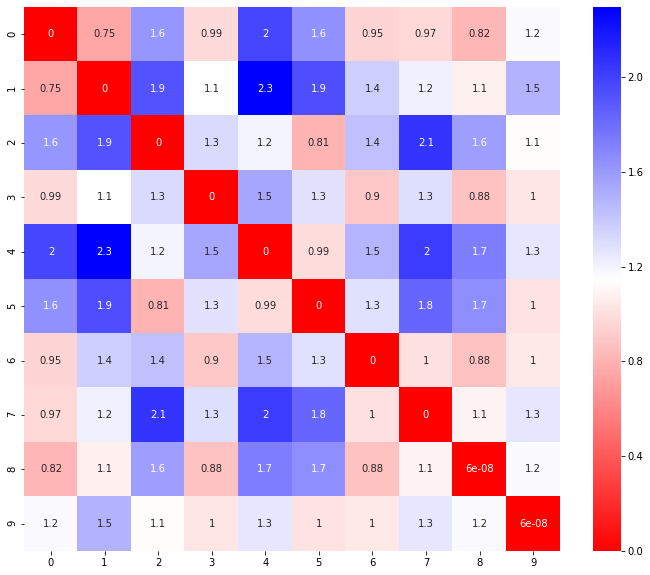

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(aux, annot=True, cmap=plt.cm.bwr_r)
plt.show()